# Exam: Create a function for scaling images

- It receives any scaling matrix
- It transforms any size image

In [110]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [111]:
def bilinearInterpolation(r, c, I):
   
    # Column indexes
    lc = int(c) # left column
    rc = lc+1   # right column

    # Row indexes
    tr = int(r) # top row
    br = tr + 1 # bottom row

    # Weights of horizontal linear indexes
    wr = c - lc
    wl = rc - c

    # Weights of vertical linear indexes
    wt = br - r
    wb = r - tr

    if tr >= 0 and br < I.shape[0] and lc >= 0 and rc < I.shape[1]:  
        # Intensity alpha (top row linear)
        a = I[tr, lc] * wl + I[tr, rc] * wr
        # Intensity betha (bottom row linear)
        b = I[br, lc] * wl + I[br, rc] * wr

        # Final intensity (vertical linear)
        f = a * wt + b * wb

        return np.uint8(f)
    else:
        return 0

In [112]:
def scaleImage(I : np.ndarray , S : np.ndarray):
    # Get image dimensions
    numRows = np.uint64(I.shape[0] * S[0,0])
    numCols = np.uint64(I.shape[1] * S[1,1])

    numRows_o = np.uint64(I.shape[0])
    numCols_o = np.uint64(I.shape[1])

    # Create new scaled Image
    I_S = np.zeros((numRows, numCols), dtype='uint8')
    T_inv = np.linalg.inv(S)
    for new_i in range(numRows):
        for new_j in range(numCols):
            P_dash = np.array([new_i, new_j])
            P = T_inv.dot(P_dash)            
            i_c, j_c = P[0], P[1]    
            if i_c < 0 or i_c>=numRows_o or j_c<0 or j_c>=numCols_o:
                    pass
            else:
                g = bilinearInterpolation(i_c,j_c,I)                
                I_S[new_i, new_j] = g
    
    return I_S

   

In [113]:
import matplotlib as mpl

def displayImageInActualSize(I):
    dpi = mpl.rcParams['figure.dpi']
    H,W = I.shape
    fig_size = W/float(dpi), H/float(dpi)
    fig = plt.figure(figsize=fig_size)
    ax = fig.add_axes([0,0,1,1])
    ax.axis('off')
    ax.imshow(I,cmap='gray')
    plt.show

## Test function

In [114]:
grayImage = r'D:\Cursos Online\Computer_Vision_in_python\practice\Unit 3\albert-einstein_gray.jpg'
I_gray = cv2.imread(grayImage, cv2.IMREAD_GRAYSCALE)

In [115]:
scaleMatrix = np.array([[3.4,0], [0, 0.1]])

In [116]:
I_S = scaleImage(I_gray, scaleMatrix)

In [ ]:
displayImageInActualSize(I_S)

# Scale RGB Images

In [142]:
def scaleRGBImage(I : np.ndarray, S : np.ndarray):
    R_s = scaleImage(I[:,:,0], S)
    G_s = scaleImage(I[:,:,1], S)
    B_s = scaleImage(I[:,:,2], S)

    return np.dstack([R_s, G_s, B_s])

In [143]:
import matplotlib as mpl

def displayImageInActualSizeColor(I):
    dpi = mpl.rcParams['figure.dpi']
    H,W = I.shape[0], I.shape[1]
    fig_size = W/float(dpi), H/float(dpi)
    fig = plt.figure(figsize=fig_size)
    ax = fig.add_axes([0,0,1,1])
    ax.axis('off')
    ax.imshow(I)
    plt.show

In [144]:
colourImage = r'D:\Cursos Online\Computer_Vision_in_python\practice\Unit 3\tulips.jpg'
I_BGR = cv2.imread(colourImage)[:,:,::-1]

In [149]:
S = np.array([[2.1,0], [0, 1.3]])

In [150]:
I_S = scaleRGBImage(I_BGR, S)

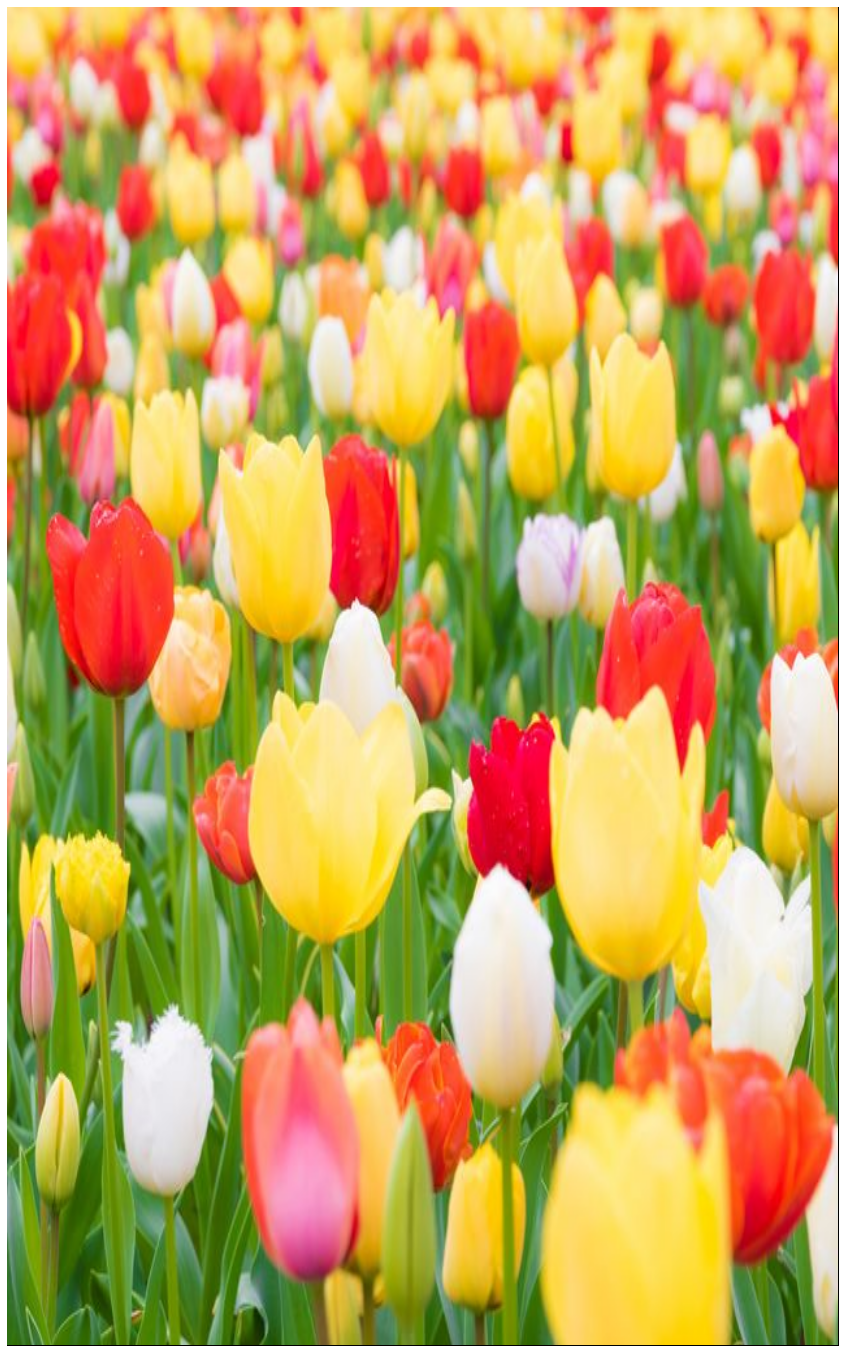

In [151]:
displayImageInActualSizeColor(I_S)